# Testing the measure with a Pairwise graph as a 3-Hypergraph

In [30]:
import numpy as np
import xgi
import networkx as nx
import copy
from collections import OrderedDict
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

from hyperfunctions import *

In [31]:
def G_to_dict(G):
    '''
    Prepare the Networkx Graph for the Hypernetx package
    '''
    
    Gdict = {}
    
    for i, edge in enumerate(G.edges):
        Gdict['edge' + str(i)] = list(edge)
    
    return Gdict

In [32]:
n = 10

In [33]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Erdös-Renyi

In [49]:
G = nx.complete_graph(5)

In [50]:
while not nx.is_planar(G) or not nx.is_connected(G):
    G = nx.erdos_renyi_graph(n, p=2*np.log(n)/n)

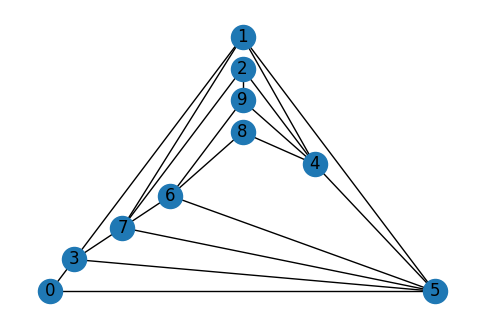

In [51]:
fig, ax = plt.subplots(1,1, figsize=(6,4))

nx.draw_planar(G, ax=ax, with_labels=True)

In [52]:
EIG = list(nx.eigenvector_centrality_numpy(G).values())

In [53]:
edgedict = G_to_dict(G)
H = xgi.Hypergraph(edgedict)
#xgi.draw(H, node_labels=True, font_color_nodes="blue")

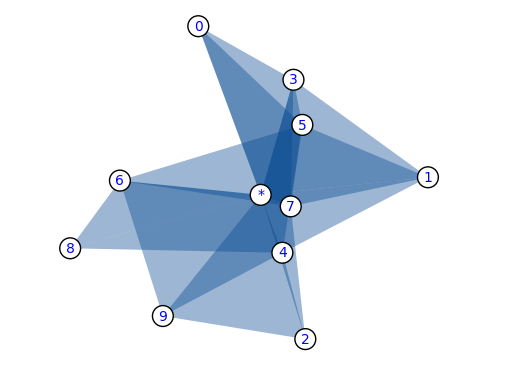

In [54]:
H3 = uniformize(H, m=3)
xgi.draw(H3, node_labels=True, font_color_nodes="blue")

In [55]:
HEC = xgi.HEC_centrality(H3)
HEC.pop('*')

0.14920625538481788

In [56]:
# Ordered list
HEC = list(OrderedDict(sorted(HEC.items())).values())

In [57]:
kendalltau(EIG, HEC).statistic

0.911111111111111

In [58]:
EIG /= np.sum(EIG)
EIG

array([0.06446299, 0.12393804, 0.07586803, 0.11452007, 0.11329592,
       0.15526256, 0.09795706, 0.13561177, 0.05047767, 0.0686059 ])

In [59]:
HEC /= np.sum(HEC)
HEC

array([0.07700968, 0.10861738, 0.09018586, 0.10488091, 0.111836  ,
       0.12624786, 0.1019995 , 0.1168278 , 0.07407271, 0.0883223 ])

In [60]:
cents = np.stack((EIG, HEC)).T

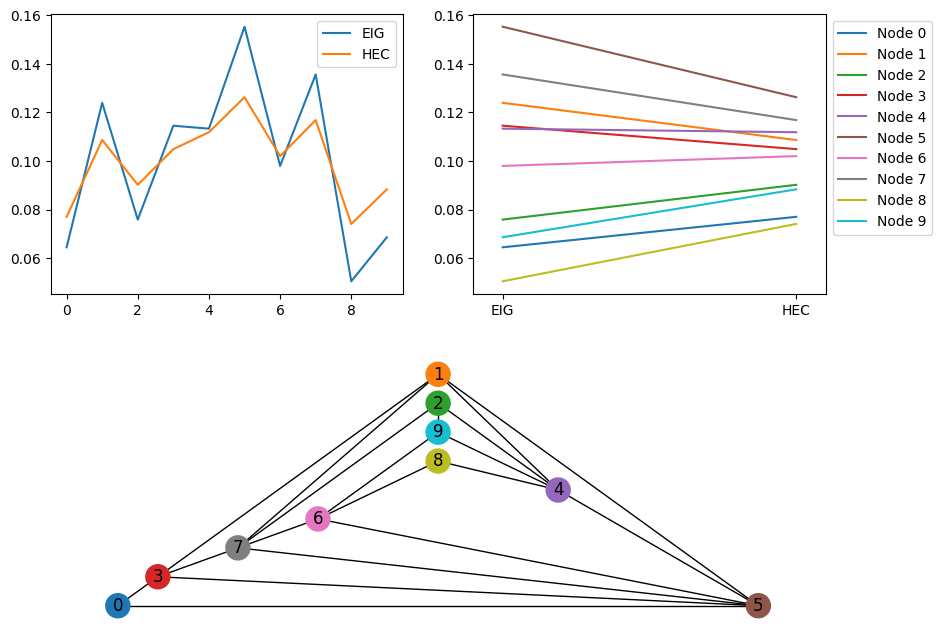

In [61]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

# First figure

ax1.plot(EIG, label='EIG')
ax1.plot(HEC, label='HEC')
ax1.legend()

# Second figure

ax2.set_xlim(-0.1,1.1)
ax2.set_xticks([0,1], ['EIG', 'HEC'])

for i, row in enumerate(cents):
    ax2.plot(row, color=colors[i], label=f'Node {i}')

ax2.legend(bbox_to_anchor=(1,1))


# Graph:
ax3 = fig.add_subplot(212)
nx.draw_planar(G, ax=ax3, with_labels=True, node_color=colors[:len(EIG)])



## Scale-free

In [18]:
G = nx.complete_graph(5)

In [19]:
while not nx.is_planar(G) or not nx.is_connected(G):
    G = nx.erdos_renyi_graph(n, p=2*np.log(n)/n)

In [20]:
EIG = list(nx.eigenvector_centrality_numpy(G).values())

In [21]:
edgedict = G_to_dict(G)
H = xgi.Hypergraph(edgedict)
#xgi.draw(H, with_labels=True)

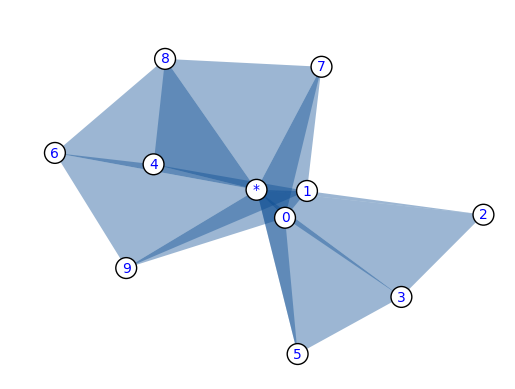

In [22]:
H3 = uniformize(H, m=3)
xgi.draw(H3, node_labels=True, font_color_nodes="blue")

In [23]:
HEC = xgi.HEC_centrality(H3)
HEC.pop('*')

0.14850869010056023

In [24]:
HEC = list(OrderedDict(sorted(HEC.items())).values())

In [25]:
kendalltau(EIG, HEC).statistic

0.911111111111111

In [26]:
EIG /= np.sum(EIG)
EIG

array([0.15132445, 0.15343218, 0.06789748, 0.08246573, 0.09128973,
       0.06729082, 0.08186901, 0.11128079, 0.08186901, 0.11128079])

In [27]:
HEC /= np.sum(HEC)
HEC

array([0.12433142, 0.1248166 , 0.08176481, 0.09380807, 0.09815494,
       0.08167406, 0.09512071, 0.10260434, 0.09512072, 0.10260434])

In [28]:
cents = np.stack((EIG, HEC)).T

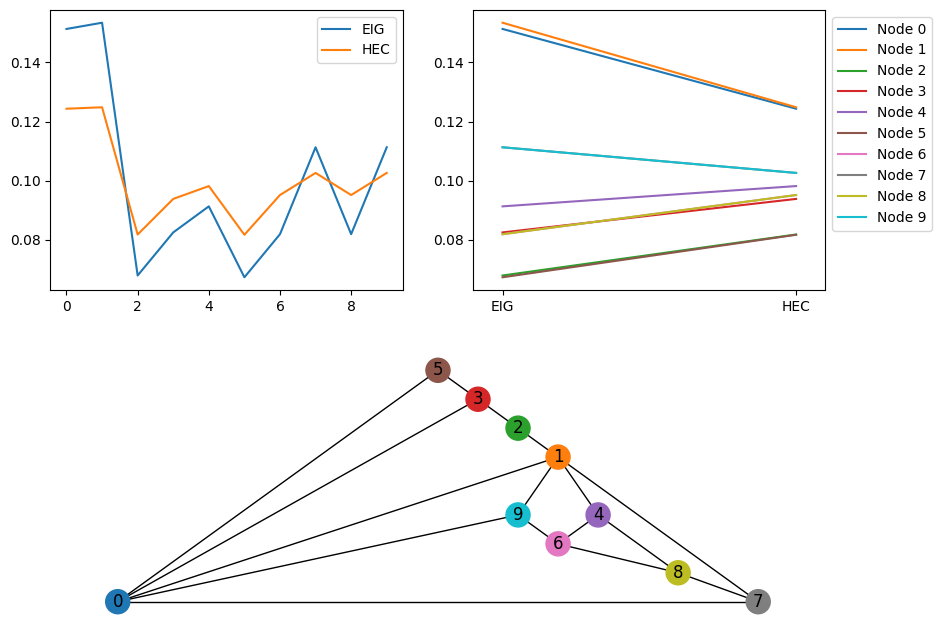

In [29]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

# First figure

ax1.plot(EIG, label='EIG')
ax1.plot(HEC, label='HEC')
ax1.legend()

# Second figure

ax2.set_xlim(-0.1,1.1)
ax2.set_xticks([0,1], ['EIG', 'HEC'])

for i, row in enumerate(cents):
    ax2.plot(row, color=colors[i], label=f'Node {i}')

ax2.legend(bbox_to_anchor=(1,1))

# Graph:
ax3 = fig.add_subplot(212)
nx.draw_planar(G, ax=ax3, with_labels=True, node_color=colors[:len(EIG)])

